### Contexto
Base de Dados de Churn 
<br>
[IBM Sample Data Sets]

### Conteúdo 

Cada linha representa um cliente.
<br>
Cada coluna contém os atributos do cliente descritos na coluna Metadados.

O conjunto de dados inclui informações sobre:
<br>
Clientes que saíram no último mês - a coluna é chamada de rotatividade
<br>
Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes
<br>
Informações da conta do cliente - há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
<br>
Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes

### Análise Exploratória

A seção abaixo visa aplicar técnicas de Estatística Descritiva para entendimento dos dados

In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
sns.set(style = 'white')

%matplotlib inline

In [2]:
#Importação da biblioteca para integração com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Criação do DataFrame e carregamento dos dados
df = pd.read_csv('/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Comando para verificar os primeiros registros
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Avaliando a estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Verifica a variável "Gender" e sua distribuição
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [7]:
#Medidas estatísticas das variáveis númericas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Conversão do campo "TotalCharges" para numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
#Verificação de valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Substituição de valores em branco e remoção de nulos do campo "TotalCharges"
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df.dropna(inplace = True)

In [11]:
#Conversão da variável preditora "Churn" em númerica
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

### Análise Gráfica

A seção abaixo visa aplicar técnicas de Visualização de Dados para melhor compreensão dos mesmos

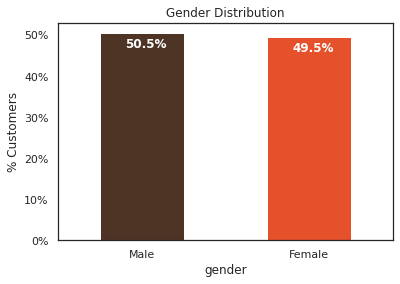

In [12]:
#Gráfico de barras para análise do gênero
#Como podemos analisar nossa base de dados está igualmente dividida entre os gêneros
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

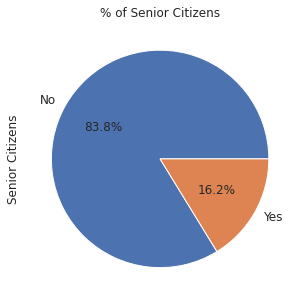

In [13]:
#Gráfico de pizza para avaliação dos clientes mais velhos
#Apenas 16% dos clientes são idosos. Assim, a maioria dos nossos clientes nos dados são jovens.
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

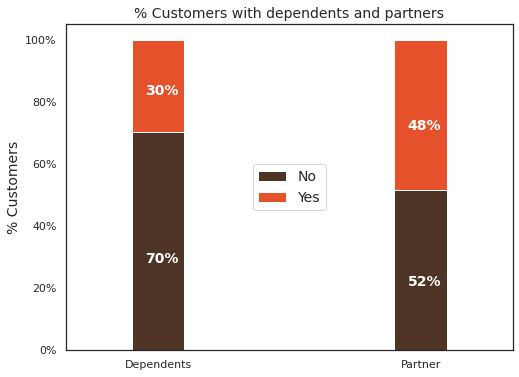

In [14]:
#Gráfico de barras empilhadas para análise de "Dependentes" e "Parceiros"
#Cerca de 50% dos clientes possuem parceiro, enquanto apenas 30% do total de clientes possuem dependentes.
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

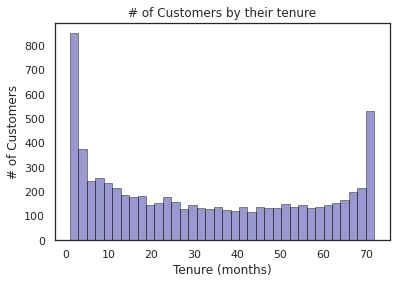

In [15]:
#Gráfico de distribuição da variável "Tenure" (Tempo de Contrato)
#Com exceção das pontas do gráfico, o tempo de contrato é bem distribuído entre os intervalos
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Contract Type')

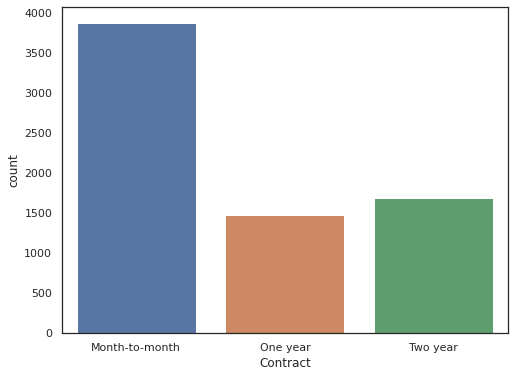

In [16]:
#Analisando os tipos de contrato
plt.figure(figsize=(8,6))
sns.countplot(df['Contract'])
ax.set_ylabel('Customers')
ax.set_title('Contract Type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


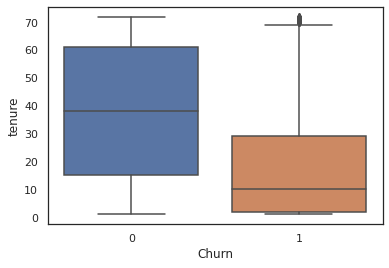

In [17]:
#Gráfico boxplot para Análise de Churn por Tempo de Contrato
sns.boxplot(df['Churn'], df['tenure'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


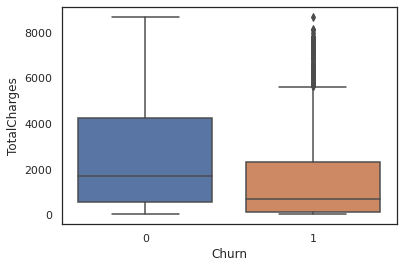

In [18]:
#Gráfico boxplot para Análise de Churn por Total Cobrado
sns.boxplot(df['Churn'], df['TotalCharges'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


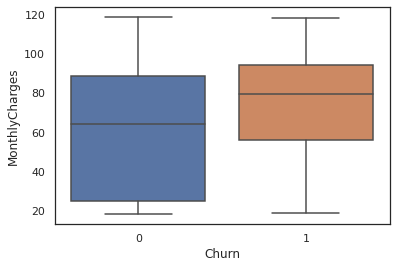

In [19]:
#Gráfico boxplot para Análise de Churn por Cobrança Mensal
sns.boxplot(df['Churn'], df['MonthlyCharges'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


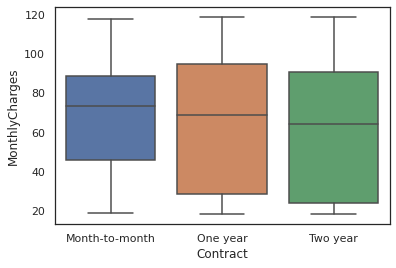

In [20]:
#Gráfico boxplot para Análise de Cobrança Mensal por Tipo de Contrato
sns.boxplot(df['Contract'], df['MonthlyCharges'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


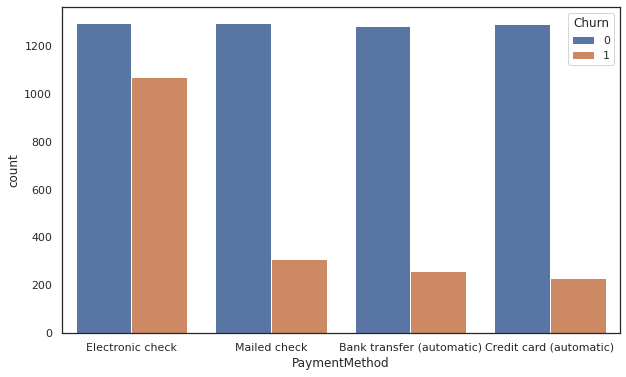

In [21]:
#Gráfico de Barras para Análise de Churn por Meios de Pagamento
plt.figure(figsize=(10,6))
sns.countplot(df['PaymentMethod'], data = df, hue='Churn')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


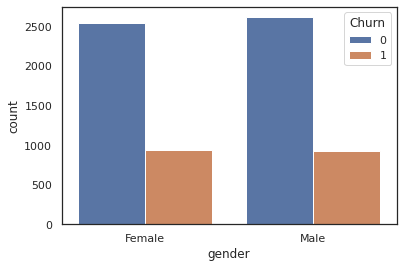

In [22]:
#Análise de Churn por Gênero
sns.countplot(df['gender'], data = df, hue='Churn')

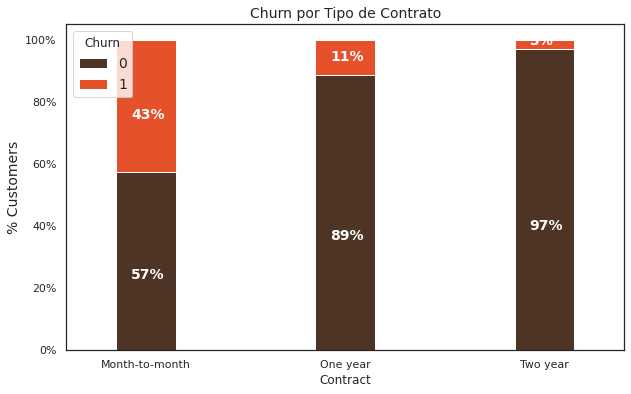

In [23]:
#Gráfico de barras empilhadas por "Tipo de Contrato"
#A análise revela que o tipo de contrato "Month-to-Month" é o que possuí o maior percentual de churn
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn por Tipo de Contrato',size = 14)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

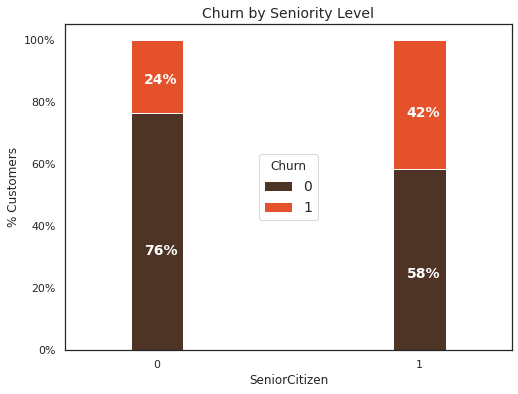

In [24]:
#Gráfico de barras empilhadas por "Senioridade"
#A análise revela que clientes mais velhos cancelam mais os contratos
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

# Implementação dos Modelos

A partir dessa seção iremos implementar os modelos de Machine Learning, bem como selecionar as variáveis e aplicar algumas técnicas de Normalização e Enconding

In [25]:
#Seleção das variáveis
y = df['Churn']
X = df.drop(columns = ['Churn','customerID'])

In [26]:
#Aplicação de técnica de Enconding para tornar os campos númericos
from sklearn.preprocessing import LabelEncoder

df_temp = X.select_dtypes(exclude='number')
#  label encoding to all the columns 

label_encoders = {}
for col in df_temp:
        le = LabelEncoder()
        le.fit(X[col])
        X[col] = le.transform(X[col])
        label_encoders[col] = le

### Técnica de Scale 

In [27]:
#Normalização das variáveis independentes
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X_matrix = scaler.transform(X)

X = pd.DataFrame(X_matrix,columns=X.columns)

In [28]:
#Importação de bibliotecas importantes
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [29]:
#Separando dados de treino e teste
from sklearn.model_selection import train_test_split
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = seed )

### Regressão Logística

Optimal number of features : 8


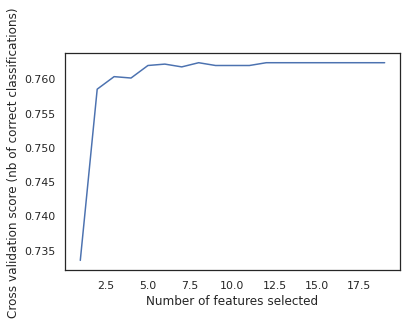

In [30]:
#Seleção de variáveis e treinamento do modelo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=seed)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),              
            scoring='accuracy')

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
#Avaliação do modelo
predictions = rfecv.predict(X_test)
print(classification_report(y_test,predictions))
print('Matriz de Confusão')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1553
           1       0.61      0.26      0.37       557

    accuracy                           0.76      2110
   macro avg       0.70      0.60      0.61      2110
weighted avg       0.74      0.76      0.72      2110

Matriz de Confusão
[[1462   91]
 [ 412  145]]


In [32]:
#Análise das variáveis que o modelo levou em consideração
df2 = pd.DataFrame(rfecv.support_)
df3 = pd.DataFrame(X.columns)
df3['X'] = df2
df3[df3['X'] == True]

,0,X
4,tenure,True
7,InternetService,True
8,OnlineSecurity,True
9,OnlineBackup,True
11,TechSupport,True
16,PaymentMethod,True
17,MonthlyCharges,True
18,TotalCharges,True


### Decision Tree

Optimal number of features : 6


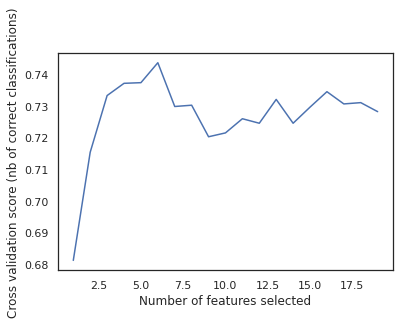

In [33]:
#Seleção de variáveis e treinamento do modelo
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=seed)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),              
            scoring='accuracy')

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [34]:
#Avaliação do modelo
predictions = rfecv.predict(X_test)
print(classification_report(y_test,predictions))
print('Matriz de Confusão')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1553
           1       0.49      0.49      0.49       557

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

Matriz de Confusão
[[1271  282]
 [ 283  274]]


In [35]:
#Análise das variáveis que o modelo levou em consideração
df2 = pd.DataFrame(rfecv.support_)
df3 = pd.DataFrame(X.columns)
df3['X'] = df2
df3[df3['X'] == True]

,0,X
4,tenure,True
7,InternetService,True
14,Contract,True
16,PaymentMethod,True
17,MonthlyCharges,True
18,TotalCharges,True


### Random Forest

Optimal number of features : 16


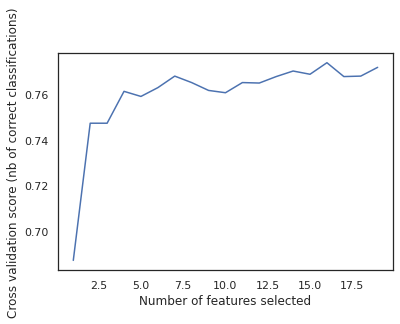

In [36]:
#Seleção de variáveis e treinamento do modelo
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5, random_state=seed)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),              
            scoring='accuracy')

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
#Avaliação do modelo
predictions = rfecv.predict(X_test)
print(classification_report(y_test,predictions))
print('Matriz de Confusão')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1553
           1       0.54      0.47      0.50       557

    accuracy                           0.75      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.75      0.75      0.75      2110

Matriz de Confusão
[[1327  226]
 [ 293  264]]


In [38]:
#Análise das variáveis que o modelo levou em consideração
df2 = pd.DataFrame(rfecv.support_)
df3 = pd.DataFrame(X.columns)
df3['X'] = df2
df3[df3['X'] == True]

,0,X
0,gender,True
2,Partner,True
4,tenure,True
5,PhoneService,True
6,MultipleLines,True
7,InternetService,True
8,OnlineSecurity,True
9,OnlineBackup,True
10,DeviceProtection,True
11,TechSupport,True


### XG Boost

Optimal number of features : 12


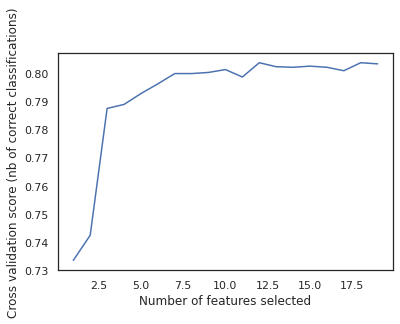

In [39]:
#Seleção de variáveis e treinamento do modelo
from xgboost import XGBClassifier

model = XGBClassifier(random_state=seed)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(4),              
            scoring='accuracy')

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [40]:
#Avaliação do modelo
predictions = rfecv.predict(X_test)
print(classification_report(y_test,predictions))
print('Matriz de Confusão')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1553
           1       0.66      0.48      0.56       557

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110

Matriz de Confusão
[[1416  137]
 [ 288  269]]


In [41]:
#Análise das variáveis que o modelo levou em consideração
df1 = pd.DataFrame(rfecv.support_)
df4 = pd.DataFrame(X.columns)
df4['X'] = df1
df4[df4['X'] == True]

,0,X
4,tenure,True
6,MultipleLines,True
7,InternetService,True
8,OnlineSecurity,True
9,OnlineBackup,True
11,TechSupport,True
12,StreamingTV,True
13,StreamingMovies,True
14,Contract,True
15,PaperlessBilling,True
